# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

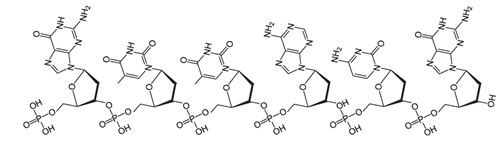

```markdown
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
3' - AUAACCAAUAUGCAAGUACAUGCA - 5' -> 5' - UGCAUGUACUUGCAUAUGGUUAU - 3'
UGC-AUG-UAC-UUG-CAU-AUG-GUU-UAU
Cystéine - Méthionine - Tyrosine - Leucine - Histidine - Méthionine - Valine - Tyrosine
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGG-CAA-AUU-UAU
UGG-CAA-AUC-UAU
UGG-CAA-AUA-UAU
UGG-CAA-AUU-UAC
UGG-CAA-AUC-UAC
UGG-CAA-AUA-UAC
UGG-CAG-AUU-UAU
UGG-CAG-AUC-UAU
UGG-CAG-AUA-UAU
UGG-CAG-AUU-UAC
UGG-CAG-AUC-UAC
UGG-CAG-AUA-UA
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [1]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
Le format fasta permet de stocker des séquences biologique.
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
C'est l'ensemble de 3 nucléotides qui se suive dans une séquence d'un acide nucléique.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Le canon START canonique est AUG, pour l'acide aminé Méthionine, c'est le point de départ de la traduction.
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Les codons STOP canoniques sont UAA, UAG, UGA, qui ne sont associés à aucun acide aminé, c'est le point final qui met un terme à la traduction.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
De 5' vers 3'
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
L'ADN se compacte dans le noyau de la cellule en s'alliant à des protéines.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Le brin précoce et le brin tardif.
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
C'est une façon de lire une séquence d'ADN, il en existe 3
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
Lorsque l'on cherche à identifier les gènes ou les régions codantes potentielles dans une séquence
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [2]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def find_orfs(sequence):
    seq_len = len(sequence)
    orfs = []
    for brin, nuc in [(+1, sequence), (-1, sequence.reverse_complement())]: #on parcourt les brins positifs et complémentaires inv.
        for cadre in range(3): #parcourt les 3 cadres de lectures
            codon = nuc[cadre:cadre+3]
            for i in range(cadre, seq_len, 3): #parcourt les codons
                if nuc[i:i+3] == 'ATG': #codon start
                    start = i
                    for j in range(i+3, seq_len, 3):
                        if nuc[j:j+3] in ['TAA', 'TAG', 'TGA']: #codons stop
                            end = j + 3
                            if end - start >= 100:
                                orfs.append((start + 1, end, brin, nuc[start:end]))
                            break
    return orfs

sequence = list(SeqIO.parse("../NC_001401.2.fna", "fasta"))[0].seq
orfs = find_orfs(sequence)
for orf in orfs:
    start, end, brin, seq = orf
    print(f"> pos {start}, pos {end}, brin {'+' if brin == 1 else '-'}")
    print(seq)

> pos 736, pos 849, brin +
ATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAGTGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAACAGTATTTAA
> pos 1252, pos 1362, brin +
ATGCGGCTTCCGTCTTTCTGGGATGGGCCACGAAAAAGTTCGGCAAGAGGAACACCATCTGGCTGTTTGGGCCTGCAACTACCGGGAAGACCAACATCGCGGAGGCCATAG
> pos 1687, pos 1827, brin +
ATGACTTTGGGAAGGTCACCAAGCAGGAAGTCAAAGACTTTTTCCGGTGGGCAAAGGATCACGTGGTTGAGGTGGAGCATGAATTCTACGTCAAAAAGGGTGGAGCCAAGAAAAGACCCGCCCCCAGTGACGCAGATATAA
> pos 2203, pos 4410, brin +
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCACCACCACCAAAGCCCGCAGAGCGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGAGAGCCGGTCAACGAGGCAGACGCCGCGGCCCTCGAGCACGACAAAGCCTACGACCGGCAGCTCGACAGCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCGGAGTTTCAGGAGCGCCTTAAAGAAGATACGTCTTTTGGGGGCAACCTCGGACGAGCAGTCTTCCAGGCGAAAAAGAGGGTTCTTGAACCTCTGGGCCTGGTTGAGGAACCTGTTAAGACGGCTCCGGGAAAAAAGAGGCCGGTAGAGCACTCTCCTGTGGAGCCAGACTCCTCCTCGGGAACCGGAAAGGCGGGCCAGCAGCCTGCAAGAAAAAGATTGAATT

Q10.	Combien d’ORFS trouvez-vous ?

In [3]:
print(f"Nombre d'ORFs trouvés : {len(orfs)}")

Nombre d'ORFs trouvés : 54


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

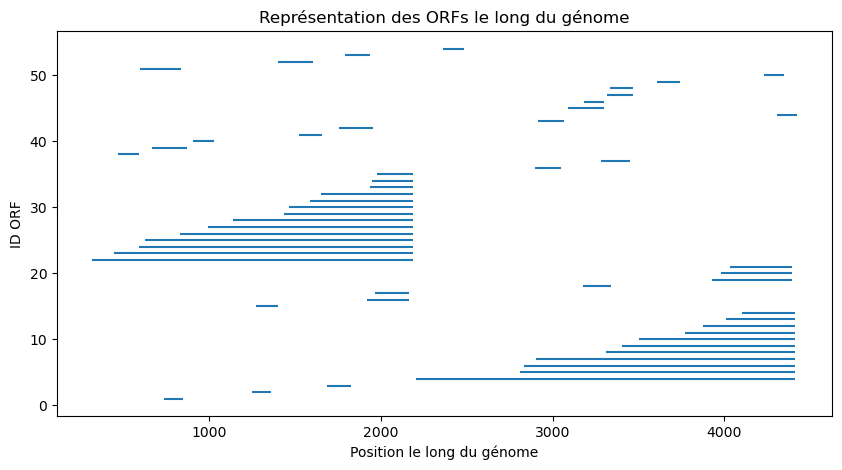

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i, orf in enumerate(orfs):
    start, end, brin, _ = orf
    plt.hlines(xmin=start, xmax=end, y=i+1)
plt.xlabel('Position le long du génome')
plt.ylabel('ID ORF')
plt.title('Représentation des ORFs le long du génome')
plt.show()

Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
𝑝𝐴𝑇G=𝑝𝐴x𝑝𝑇x𝑝𝐺
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
P(TAA)=𝑝𝑇x𝑝𝐴x𝑝𝐴
P(TAG)=𝑝𝑇x𝑝𝐴x𝑝𝐺
P(TGA)=𝑝𝑇x𝑝𝐺x𝑝𝐴
P(STOP)=P(TAA)+P(TAG)+P(TGA)
```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

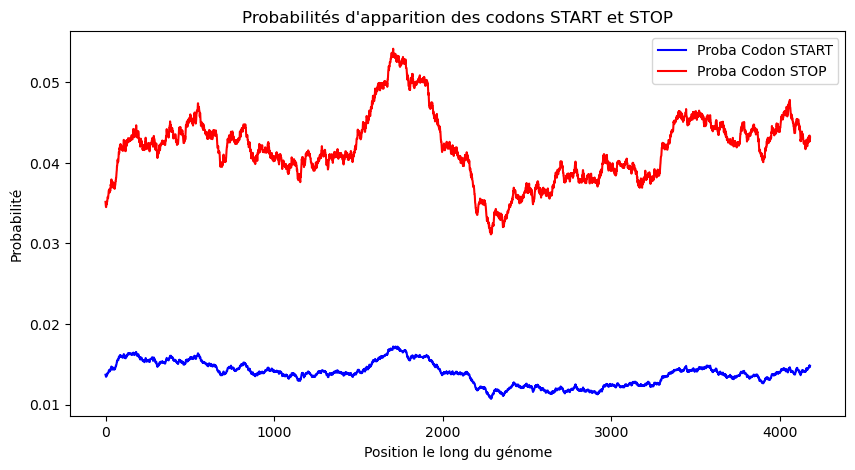

In [5]:
import numpy as np

starts = []
stops = []
window_size=501
for i in range(window_size//2, len(sequence)-window_size//2):
    window = sequence[i-window_size//2:i+window_size//2]
    freq_A = window.count('A')/window_size
    freq_T = window.count('T')/window_size
    freq_G = window.count('G')/window_size
    freq_C = window.count('C')/window_size
    start = freq_A*freq_T*freq_G
    stop = (freq_T*freq_A*freq_A + freq_T*freq_A*freq_G + freq_T*freq_G*freq_A)
    starts.append(start)
    stops.append(stop)

plt.figure(figsize=(10, 5))
plt.plot(starts, label='Proba Codon START', color='blue')
plt.plot(stops, label='Proba Codon STOP', color='red')
plt.xlabel('Position le long du génome')
plt.ylabel('Probabilité')
plt.title('Probabilités d\'apparition des codons START et STOP')
plt.legend()
plt.show()

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [6]:
fna_file = "../gene.fna"
sequence2 = list(SeqIO.parse(fna_file, "fasta"))
for orf in orfs:
    start, end, brin, seq = orf
    for seq2 in sequence2:
        if seq in seq2.seq:
            print(f"ORF trouvé dans la sequence {seq2.id}, pos: {start}-{end} sur le brin{'+' if brin == 1 else '-'}")

ORF trouvé dans la sequence NC_001401.2:287-4451, pos: 736-849 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2252, pos: 736-849 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2186, pos: 736-849 sur le brin+
ORF trouvé dans la sequence NC_001401.2:287-4451, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2252, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2186, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:878-4451, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:993-2252, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:993-2186, pos: 1252-1362 sur le brin+
ORF trouvé dans la sequence NC_001401.2:287-4451, pos: 1687-1827 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2252, pos: 1687-1827 sur le brin+
ORF trouvé dans la sequence NC_001401.2:321-2186, pos: 1687-1827 sur le brin+
ORF trouvé dans la sequence NC_001401.2:878-4451, pos: 1687-1827 sur l

Q16. Qu’observez-vous ?

```markdown
Il n'y a pas les mêmes ORF sur les brins -.
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [10]:
from Bio.Data import CodonTable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

def codon_freq(sequence):
    codon_table = CodonTable.unambiguous_dna_by_id[1]
    codon_count = defaultdict(int)
    amin_count = defaultdict(int)
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:
            codon_count[codon] += 1
            amin = codon_table.forward_table.get(codon, '*')
            amin_count[amin] += 1
    codon_freq = {}
    for codon, count in codon_count.items():
        amin = codon_table.forward_table.get(codon, '*')
        codon_freq[codon] = count / amin_count[amin]
    return codon_freq

genomes = {
    "AAV2": "../NC_001401.2.fna",
    "Plasmodium Falcipam 3D7 Chromosome 9": "../AL844508.fna",
    "Escherichia coli BL21": "../NZ_CP053601.fna",
    "Homo Sapiens Chromosome 10": "../NC_000010.11.fna"
}
codon_freqs = {}
for organism, file in genomes.items():
    record = SeqIO.read(file, "fasta")
    sequence = str(record.seq)
    codon_freqs[organism] = codon_freq(sequence)

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

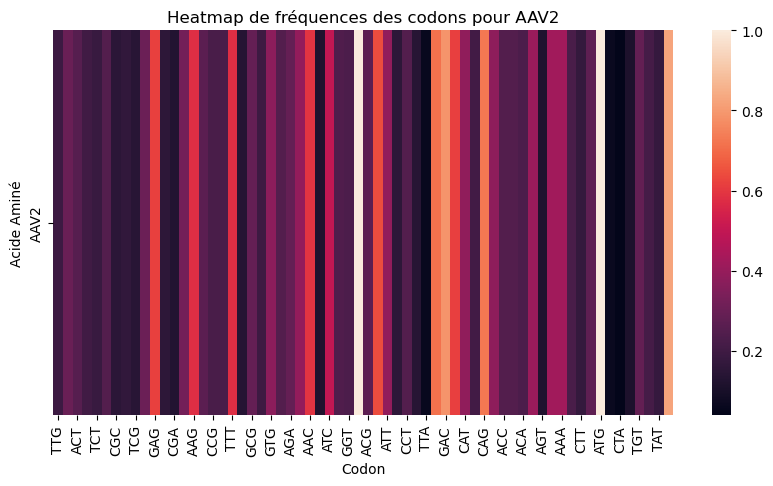

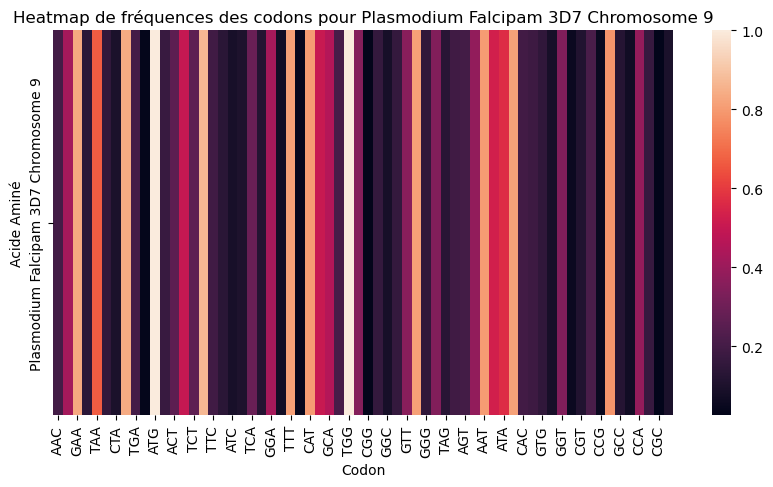

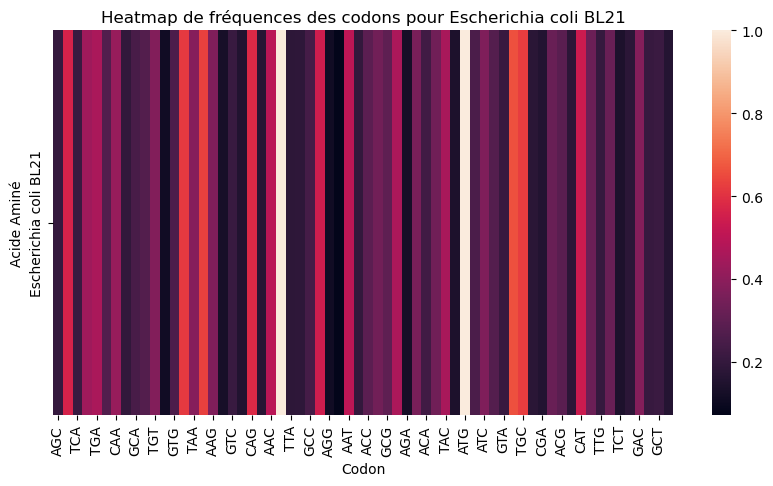

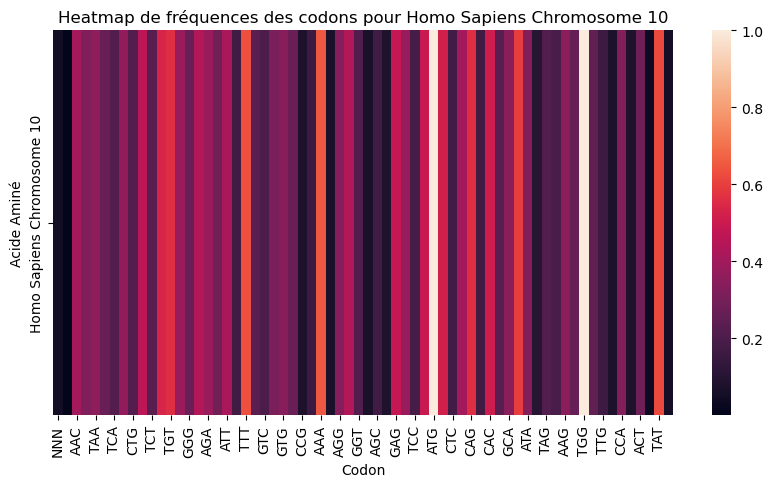

In [12]:
codon_df = pd.DataFrame(codon_freqs).fillna(0)
for organism in codon_freqs.keys():
    plt.figure(figsize=(10, 5))
    sns.heatmap(pd.DataFrame(codon_freqs[organism], index=[organism]))
    plt.title(f'Heatmap de fréquences des codons pour {organism}')
    plt.xlabel('Codon')
    plt.ylabel('Acide Aminé')
    plt.show()


Q4. Ces heatmaps sont-elles similaires ?

```markdown
Non
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.